<a id='top'></a>

<a href='#eda'>EDA</a> | <a href='#LR'>LINEAR REGRESSION</a> | <a href='#EVAL'>MODEL EVALUATIONS</a> | <a href='#summary'>SUMMARY &amp; CONCLUSIONS</a>
<br><br>

---
# THE DATA
The dataset contains information related to housing in the Boston, Massachusetts area. This includes features related to structure, neighborhood, accessibility and air quality. Much of the data was collected by the U.S Census Service in 1970, but the complete dataset was put together for the original publication: Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

---
# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

# Import Python Modules 

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

#from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

# Metrics and More
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("notebook")







<a href='#top' id='eda'>back to menu</a>

***
# EXPLORATORY DATA ANALYSIS

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['DESCR', 'feature_names', 'data', 'target'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# Info on data types and columns
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Preliminary Thoughts 

> No missing values! Keep in mind that CHAS is categorical variable transformed into set of dummy variables!
>**First impressions:**
- Education `PTRATIO` should have an high impact on house prices. Education and `LSTAT` might be linear dependent of each other based on our real life experiences
- `CRIM` Crime rates must be checked 
- `LSTAT` either a result of Pricey houses or might be a factor in high-low prices. A lower `LTSAT` indicates people with higher incomes in the neighborhood as compared to others. 
- `RM`  how big the residence is an important factor in pricing. The prices increase with increase in the average number of rooms among homes in the neighborhood. 
- `AGE` Aged houses should be cheaper if not invested and renovated
- `RAD` distance from main stream highways can be a significant factor in house prices
- `DIS` weighted distances to five Boston employment centres, this worth checking as well


## Visuals
**Low Diag : Residuals | Diag: Histograms | Upper Diag: Scatter Plots**


#### PRICE - CRIME and EDUCATION

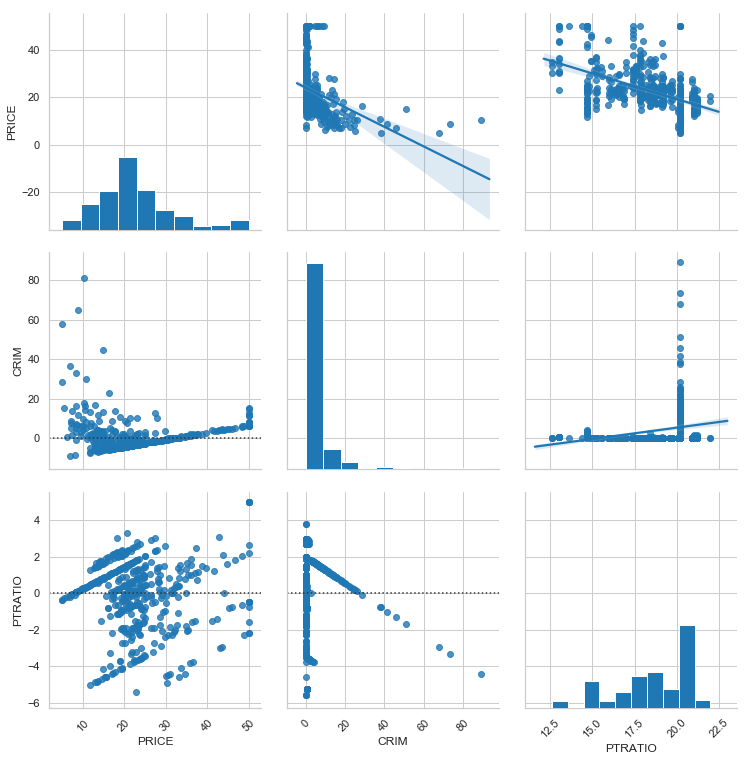

In [13]:
g = sns.PairGrid(bos[['PRICE','CRIM', 'PTRATIO']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>** Conclusion 1: **
House Prices and `Education quality` show a good linearity. The depencdency between those two was expected.

#### PRICE - INCOME LEVEL - CRIME

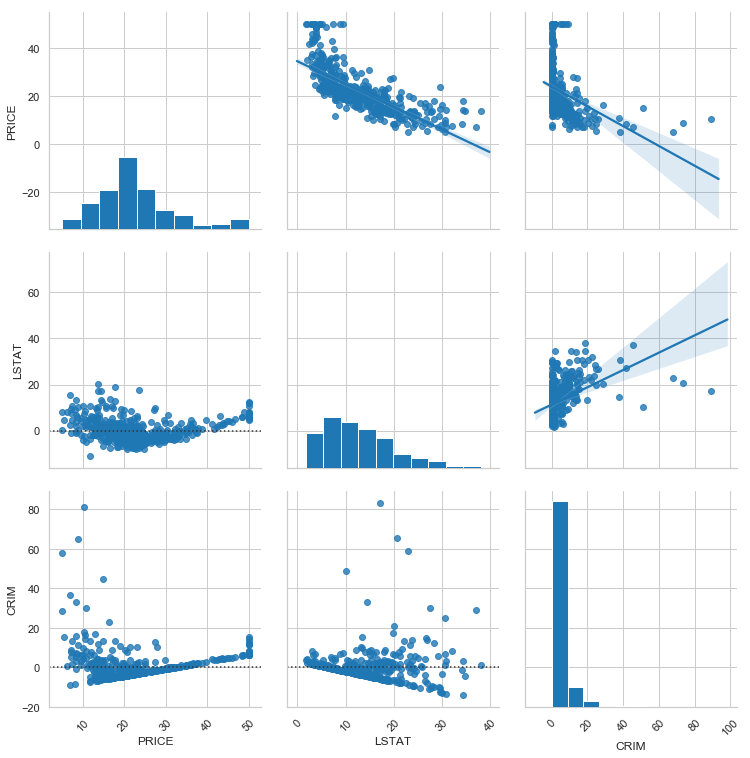

In [14]:
# PRICE - LSTAT - CRIME
g = sns.PairGrid(bos[['PRICE','LSTAT', 'CRIM']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>** Conclusion 2: **
Interesting, House Prices do not look like linearly dependent to Crime (per capita in town). Relationship between `LSTAT` and `PRICE` looks like a polynomial of degree 2 or more perhaps. We could try checking polynomial fit `POLYFIT` for this independent variable.

#### PRICE -  SIZE of RESIDENCE  and INCOME LEVEL

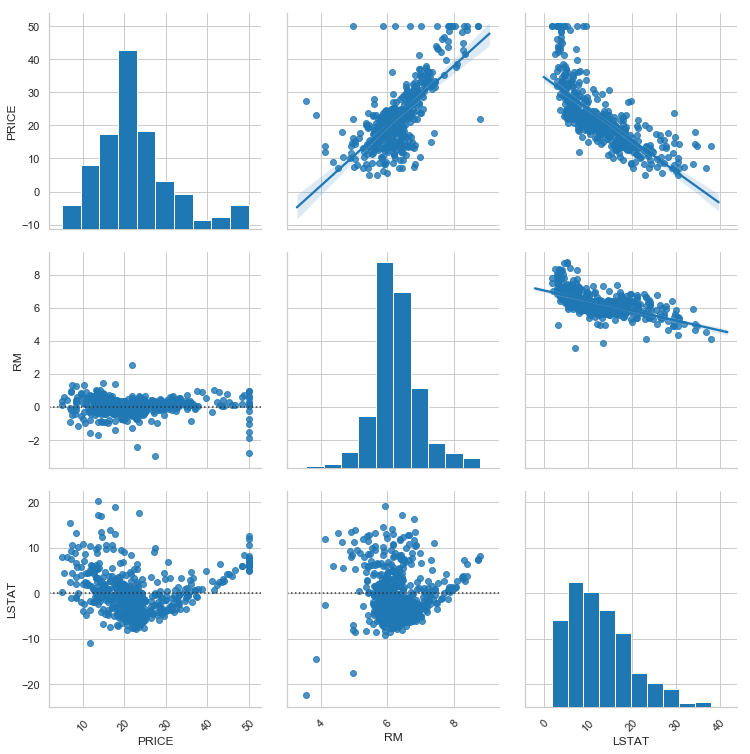

In [15]:
# PRICE - RM - LSTAT
g = sns.PairGrid(bos[['PRICE','RM', 'LSTAT']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>**Conclusion 3:**
Definitely, `LSTAT` and `RM` are important factors. Pay attention to relationship between RM and LSTAT is shown in the middle-right scatter plot. This might cause a `Collinearity` between them. It really makes sense with the lower budgets you would get smaller sized dwelling. This relationship might be non-linear though based on the scatter plot

#### PRICE - AGING EFFECT - DISTANCE to HIGHWAYS

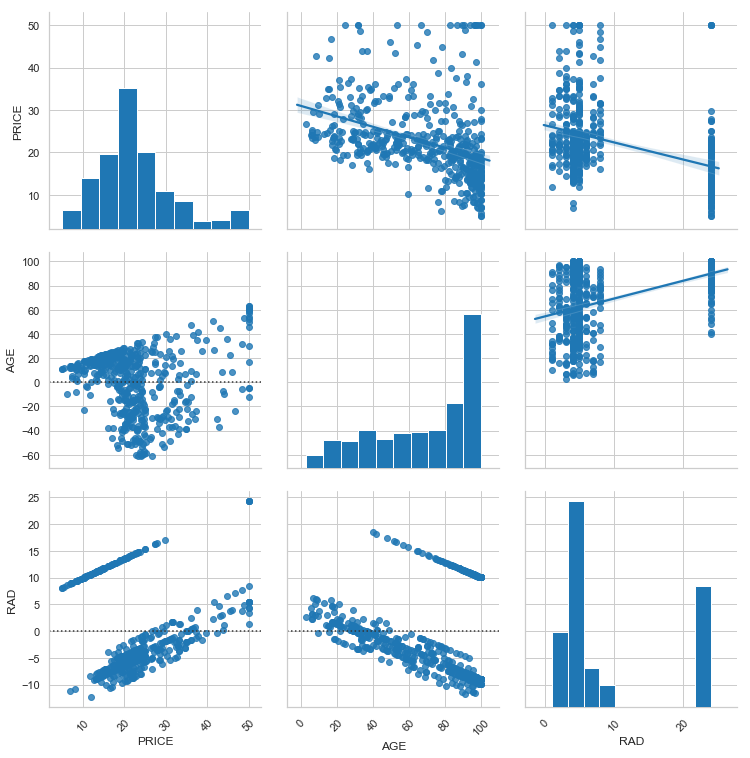

In [16]:
# PRICE - AGE - RAD
g = sns.PairGrid(bos[['PRICE','AGE', 'RAD']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>**Conclusion 4**  Younger the residence, higher gets the prices ??? A statistical test might help us understanding the underlying relationship between AGE factor and PRICE. `Hypothesis Test` for AGE as a factor of House Prices would be reasonable here. 

>RAD vs PRICE shows no linearity and variation is too much. If we look at RAD index 5 where many observations fall into, we see that hosuing prices are vary from 0 all the way up to 50K. 

#### PRICE - AGING - DISTANCE to WORK

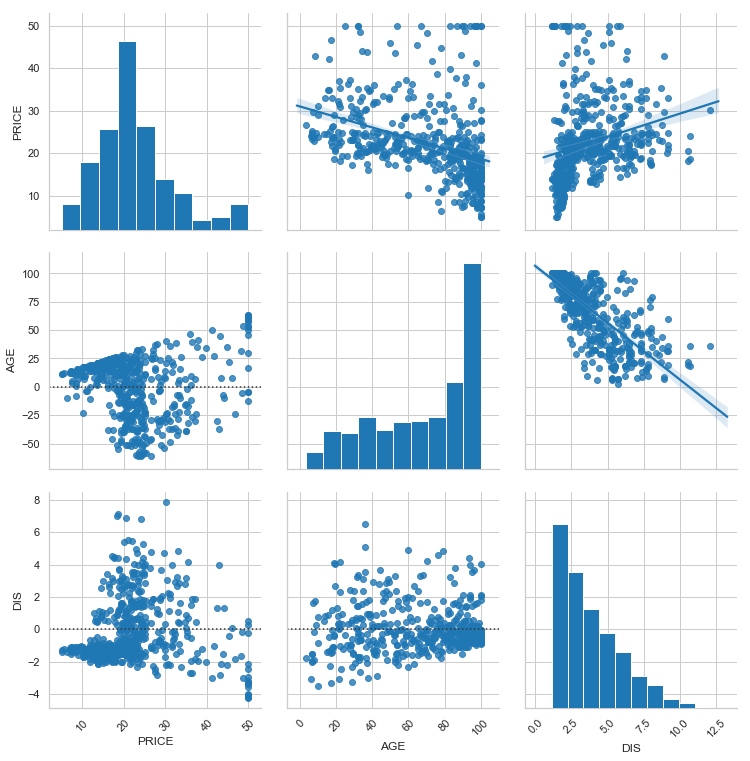

In [17]:
# PRICE - AGE - DIS
g = sns.PairGrid(bos[['PRICE','AGE', 'DIS']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

>**Conclusion 5** As seen above, DIS and AGE shows linear dependence to each other. We should not be taking both at once in the Linear Regression model as it shows collinearity condition. 

#### PRICE - AGING - CRIMES

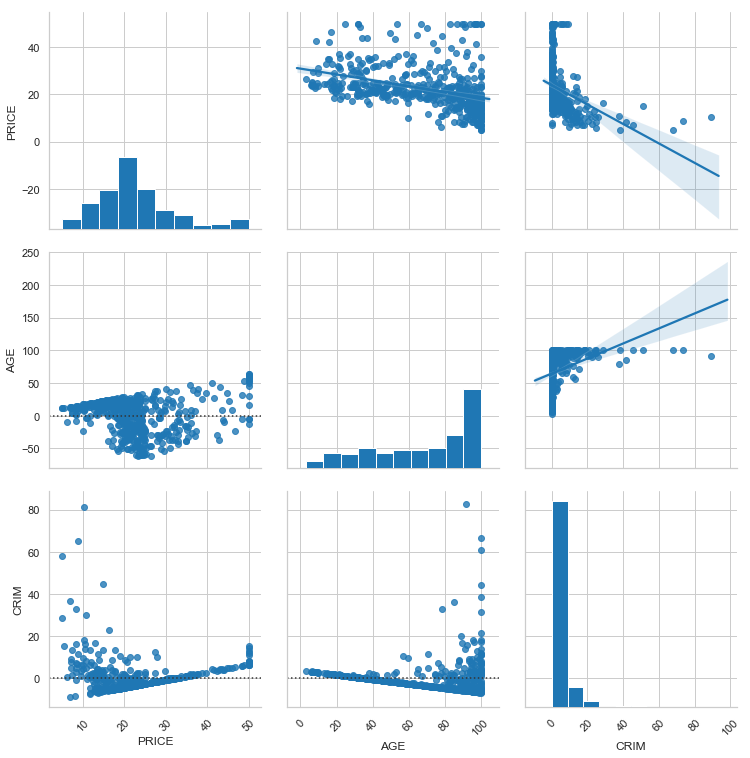

In [18]:
# PRICE - AGE - CRIME
g = sns.PairGrid(bos[['PRICE','AGE', 'CRIM']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

#### PRICE - CHAS - NOX

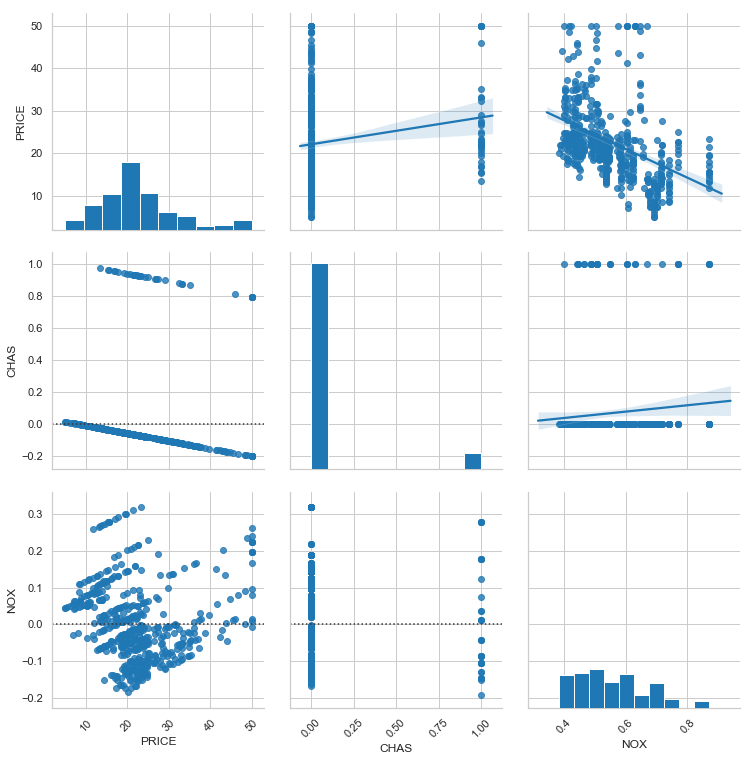

In [19]:
# PRICE - CHAS - NOX
g = sns.PairGrid(bos[['PRICE','CHAS', 'NOX']], height=3.5, aspect=1)
# Regression Lines at the Upper Diag
g.map_upper(sns.regplot)
# Residual Plots at the Lower Diag
g.map_lower(sns.residplot)
# Histograms at the Diag
g.map_diag(plt.hist)
# Ticks Label Oriantation
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)
plt.show()

#### Summary:

> - Increase in `RM` will lead to an increase in `PRICE`
> - Increase in `LSTAT` will lead to a decrease in `PRICE`
> - `RM` and `LSTAT` may be dependent of one another! We should pay attention to this. We could check for *VIF- Variance Inflation Factor*
> - Residual plot of `RM` and `PRICE` is not as it is supposed to be, ideally 
> - `PTRATIO` Lower the studentt teacher ratio, higher the quality of education and therefore, the neighborhood would be more sought after and have a higher price.
> - For now the features `RM` , `LSTAT` and `PTRATIO` are essential and also we should apply statistical test to see if `AGE` is a factor in house pricing in Boston. But before the statistical test first look at the correlation matrix if those two are correlated.
> I could have used [variance reduction](https://statweb.stanford.edu/~owen/mc/Ch-var-basic.pdf) on some variables to improve the correlation of independents variable with dependent variable. It is out of the scope of this study so we leave them as they are.


## Correlation

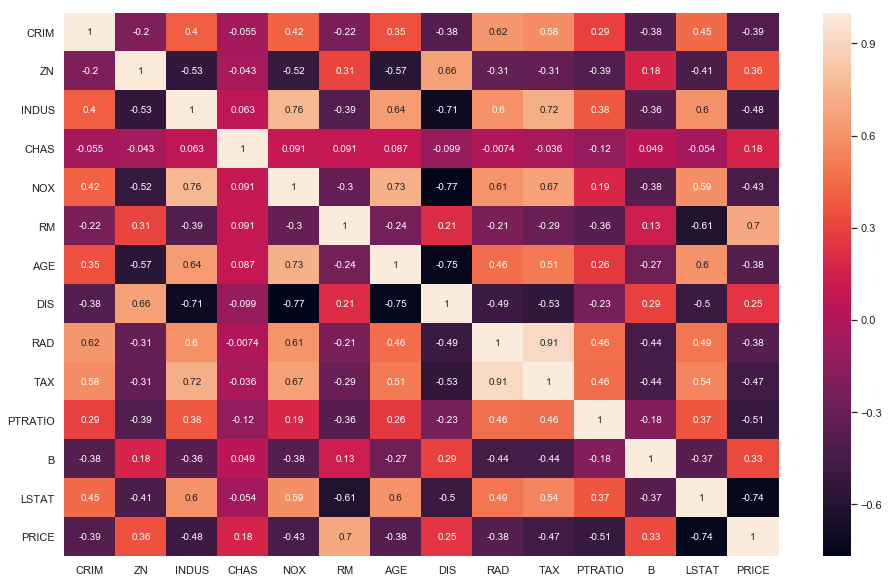

In [74]:
fig, ax = plt.subplots(figsize=(16,10))
correlation_matrix = bos.corr()
ax = sns.heatmap(data=correlation_matrix, cbar=True, annot=True)

In [21]:
# Correlation of Independent variables with the Dependent variable sorted
correlation_matrix['PRICE'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

> To fit a linear regression model, we select those features which have a high correlation with our target variable `PPRICE`. By looking at the correlation matrix we can see that `RM` has a strong positive correlation with `PRICE` (0.7) where as `LSTAT` has a high negative correlation with `PRICE`(-0.74).
>    
> An important point in selecting features for a linear regression model is to check for collinearity/multicolinearity. For isntance, features `RAD`, `TAX` have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features `DIS` and `AGE` which have a correlation of -0.75 or `INDUS` and `NOX` have .76
>
> VIF can be used to employ further analysis if there is collinearity/multicollinearity.

### Histograms
***


<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

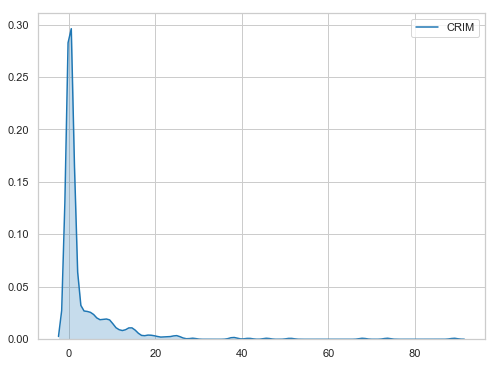

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.kdeplot(bos.CRIM, shade=True, label='CRIM')

In [23]:
# Compute the skewness of a data set
print('Measure of skewness BEFORE LOG: ', stats.skew(bos.CRIM, bias=False))
# Compute the skewness the log of the same data
print('After : ', stats.skew(np.log(bos.CRIM), bias=False))

Measure of skewness BEFORE LOG:  5.237578293084702
After :  0.4099351332239863


> - Measure of skewness of CRIME data:  5.222039072246122 .
> - For normally distributed data, the skewness should be about 0. 
> - The log transformation can help getting less skewed distribution if the original form of the data is highly skewed. As seen above the original CRIME per capita is right skewed.

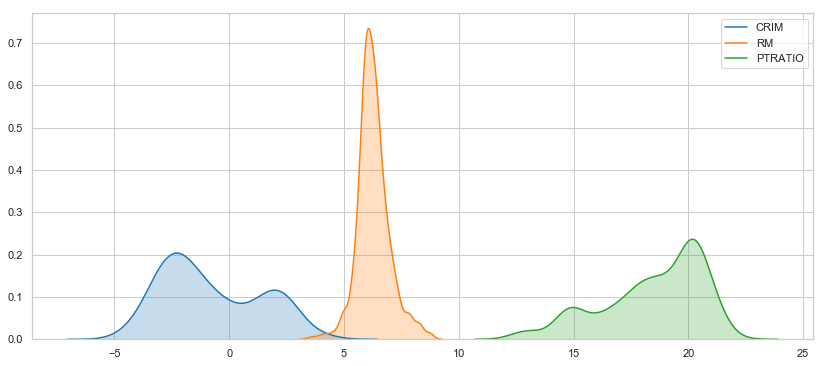

In [24]:
fig, ax = plt.subplots(figsize=(14,6))
sns.kdeplot(np.log(bos.CRIM), shade=True, label='CRIM')
sns.kdeplot(bos.RM, shade=True, label='RM')
sns.kdeplot(bos.PTRATIO, shade=True, label='PTRATIO');


<a href='#top' id='LR'>back to menu</a>

---
# LINEAR REGRESSION
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

---

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

#### Multiple Linear Regression Assumptions
1. Linearity
2. No multicollinearity
3. Homoscedasticity
4. Multivariate normality
5. Independence of errors

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [25]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           2.49e-74
Time:                        12:10:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [27]:
# Show all available methods related to model variable
print(dir(m))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'pa

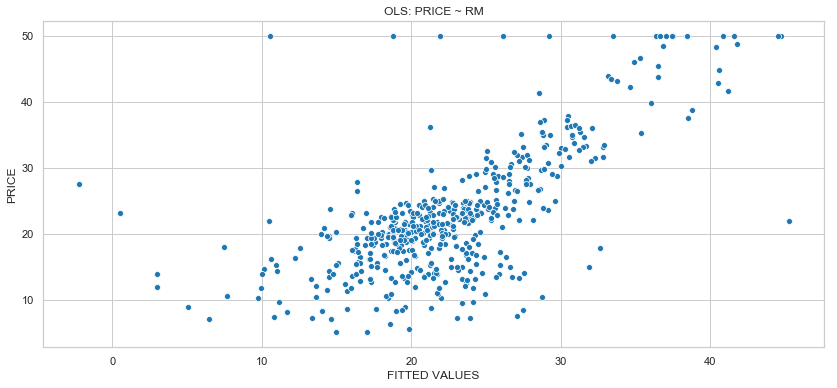

In [28]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.scatterplot(x=m.fittedvalues, y=bos.PRICE)
ax.set_xlabel('FITTED VALUES', fontsize=12)
ax.set_title('OLS: PRICE ~ RM', fontsize=12);

> Although `RM` explained some variation in `PRICE`, looks like there are other factors playin role in the `PRICE` varation.
> In EDA section we have shown that `RM`, `PTRATIO` and `LSTAT` may be the important factors. In this section we will keep investigating the variables of interest using Linear Regression and some statistical tests.

### Fit All at once

In [29]:
# Least Squares Fit
formula = 'PRICE ~ C(CHAS) + CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT '
model = smf.ols(formula, data=bos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          6.95e-135
Time:                        12:10:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.4911      5.104      7.149      0.000      26.462      46.520
C(CHAS)[T.1.0]     2.6886      0.862      3.120      0.002       0.996       4.381
CRIM              -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN                 0.0464      0.014      3.380      0.001       0.019       0.073
INDUS              0.0209      0.061      0.339      0.735      -0.100       0.142
NOX              -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM                 3.8048      0.418      9.102      0.000       2.983       4.626
AGE                0.0008      0.013      0.057      0.955      -0.025       0.027
DIS               -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD                0.3057      0.066      4.608      0.000       0.175       0.436
TAX               -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO           -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B                  0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT             -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>Warning Number 2 is important data. So we could check for Multi-Collinearity by using Correlation matrix. However, with this size of data it is hard to interpret resulting eigenvalues and eigenvectors. Instead, we could use VIF aka Variance Inflation Factors metric to determine multi-collinearity.

### Collinearity

>A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable.
>
>The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. That last portion is crucial for our discussion about multicollinearity.
>
>The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.
>
>Multicollinearity causes the following two basic types of problems:
>
>The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
>
>Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.
>
>The lower precision, switched signs, and a lack of statistical significance are typical problems associated with multicollinearity
>
>However, these issues affect only those independent variables that are correlated. You can have a model with severe multicollinearity and yet some variables in the model can be completely unaffected
>
>Some solutions to Multi-Collinearity
> -  Centering the variables is a simple way to reduce structural multicollinearity. Centering the variables is also known as standardizing the variables by subtracting the mean. 
> - Removing the variable(s) that is highly correlated with independent variables.
> - Linearly combine the independent variables, such as adding them together.
> - Perform an analysis designed for highly correlated variables, such as `principal component analysis` or `partial least squares`.

>[source](http://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)


### Fix Multicollinearity 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
X = bos.drop('PRICE', axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.074626,CRIM
1,2.843890,ZN
2,14.484283,INDUS
3,1.152891,CHAS
4,73.902212,NOX
5,77.934969,RM
6,21.386774,AGE
7,14.699368,DIS
8,15.154742,RAD
9,61.226929,TAX


>**Interpreting VIF:**
As a rule of thumb, if the VIF exceeds 5 or 10, multicollinearity is likely present and you should consider dropping the variable.

> Before dropping any feature, we should go back and check teh correlation matrix. If the HIGH VIF value
>mathces with a high correlation then we can try dropping one of the features that highly correlated.
>For instance, `TAX` and `RAD` seems to be correlated by .93. Let's DROP one of them try VIF again 
>
>
>

In [31]:
# For each X, calculate VIF and save in dataframe
X = bos.drop(['PRICE','RAD'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.936149,CRIM
1,2.804825,ZN
2,13.391220,INDUS
3,1.140412,CHAS
4,73.883063,NOX
5,77.615388,RM
6,21.323124,AGE
7,14.447156,DIS
8,22.586249,TAX
9,84.978492,PTRATIO


>As seen above the VIF score for TAX dropped by one third of previous value. 

### Investigate  PTRATIO and RM 

In [32]:
# For each X, calculate VIF and save in dataframe
X = bos[['RM', 'PTRATIO']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,28.779367,RM
1,28.779367,PTRATIO


> Looks like `RM` and `PTRATIO` are collinear !!!
> Should we remove one of them? 

In [33]:
# Least Squares Fit
formula = 'PRICE ~ LSTAT + CRIM + RAD + C(CHAS) + ZN + RM + PTRATIO'
model = smf.ols(formula, data=bos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     159.3
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          9.15e-123
Time:                        12:10:49   Log-Likelihood:                -1542.8
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     498   BIC:                             3135.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.4829      4.155      4.448      0.000      10.319      26.647
C(CHAS)[T.1.0]     3.2687      0.918      3.562      0.000       1.466       5.072
LSTAT             -0.5615      0.048    -11.746      0.000      -0.655      -0.468
CRIM              -0.0860      0.035     -2.458      0.014      -0.155      -0.017
RAD                0.0549      0.038      1.445      0.149      -0.020       0.129
ZN                -0.0023      0.011     -0.204      0.838      -0.025       0.020
RM                 4.4168      0.429     10.290      0.000       3.573       5.260
PTRATIO           -0.9221      0.130     -7.095      0.000      -1.177      -0.667
==============================================================================
Omnibus:                      182.524   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.907
Skew:                           1.551   Prob(JB):                    6.14e-181
Kurtosis:                       8.453   Cond. No.                         547.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# For each X, calculate VIF and save in dataframe
X = bos[['LSTAT', 'CRIM', 'RAD', 'CHAS',  'ZN', 'RM']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,5.136170,LSTAT
1,2.015481,CRIM
2,4.086157,RAD
3,1.090441,CHAS
4,1.552160,ZN
5,5.495276,RM


> After all tests have been done, reuslt of VIF suggests that we should drop these features:
>`AGE + TAX + INDUS + NOX + B + DIS + PTRATIO` 
>
> However, we know that the Education Quality indicator `PTRATIO` is very important data in determining house prices in Real Life case. We should find a way to keep it.
>

In [35]:
# Least Squares Fit
formula = 'PRICE ~ LSTAT + CRIM + RAD + C(CHAS) + ZN + RM'
model = smf.ols(formula, data=bos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          1.59e-113
Time:                        12:10:50   Log-Likelihood:                -1567.2
No. Observations:                 506   AIC:                             3148.
Df Residuals:                     499   BIC:                             3178.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.1013      3.118     -0.674      0.501      -8.227       4.025
C(CHAS)[T.1.0]     4.1492      0.953      4.354      0.000       2.277       6.022
LSTAT             -0.5517      0.050    -11.016      0.000      -0.650      -0.453
CRIM              -0.0775      0.037     -2.114      0.035      -0.150      -0.005
RAD               -0.0336      0.038     -0.894      0.372      -0.107       0.040
ZN                 0.0172      0.012      1.496      0.135      -0.005       0.040
RM                 5.0490      0.440     11.471      0.000       4.184       5.914
==============================================================================
Omnibus:                      171.324   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.518
Skew:                           1.507   Prob(JB):                    8.30e-145
Kurtosis:                       7.732   Cond. No.                         350.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Now we do not have WARNING 2 anymore. Since the p_value associated with the variable `RAD` and `ZN`, respectively,  is not significant so we drop them.

In [36]:
# Least Squares Fit
formula = 'PRICE ~ LSTAT + CRIM  + C(CHAS)+ RM '
model = smf.ols(formula, data=bos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     240.7
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          3.84e-115
Time:                        12:10:50   Log-Likelihood:                -1569.0
No. Observations:                 506   AIC:                             3148.
Df Residuals:                     501   BIC:                             3169.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.8591      3.118     -0.596      0.551      -7.985       4.266
C(CHAS)[T.1.0]     4.0020      0.951      4.207      0.000       2.133       5.871
LSTAT             -0.5842      0.047    -12.482      0.000      -0.676      -0.492
CRIM              -0.0957      0.031     -3.039      0.002      -0.158      -0.034
RM                 5.0681      0.436     11.620      0.000       4.211       5.925
==============================================================================
Omnibus:                      156.637   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.573
Skew:                           1.403   Prob(JB):                    1.69e-120
Kurtosis:                       7.277   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Adjusted R^2 is 65% and F-Statistic is 240.7. These values are so far so good, we will try to improve them. F-statistic with its very small p_value suggests that coefficients of independent variables are not zero!
>
> For multiple linear regression the standard interpretation of coefficients is that **a one unit change in the predictor variable results in a change in the response variable by an average of $b$ units while all other predictors are held constant**. 

# OOOOPPPS ! WHY QQ Plot is weird looking?

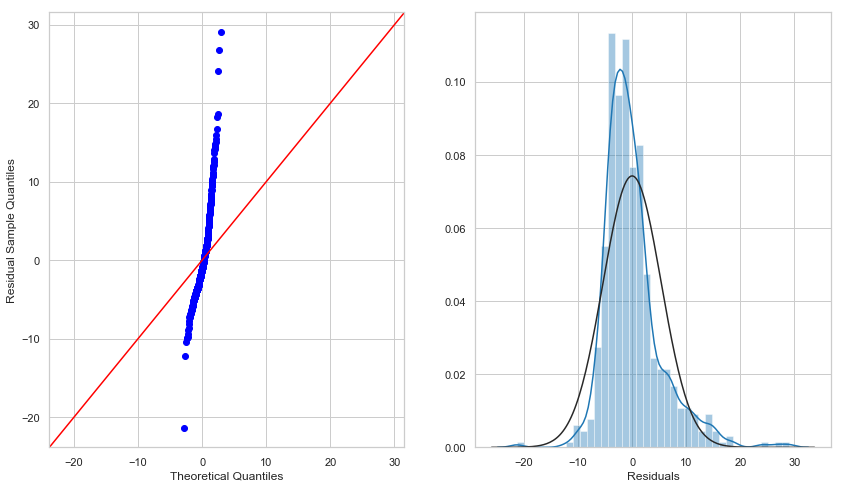

In [37]:
from scipy.stats import norm

# Let's have a look at the distibution of residuals. We should see Normal Distribution! 
fig, ax = plt.subplots(1,2,figsize=(14,8), sharey=False)
sns.distplot(model.resid, axlabel='Residuals', fit=norm, ax=ax[1])
sm.qqplot(model.resid, line='45',ax=ax[0])
ax[0].set_ylabel('Residual Sample Quantiles');

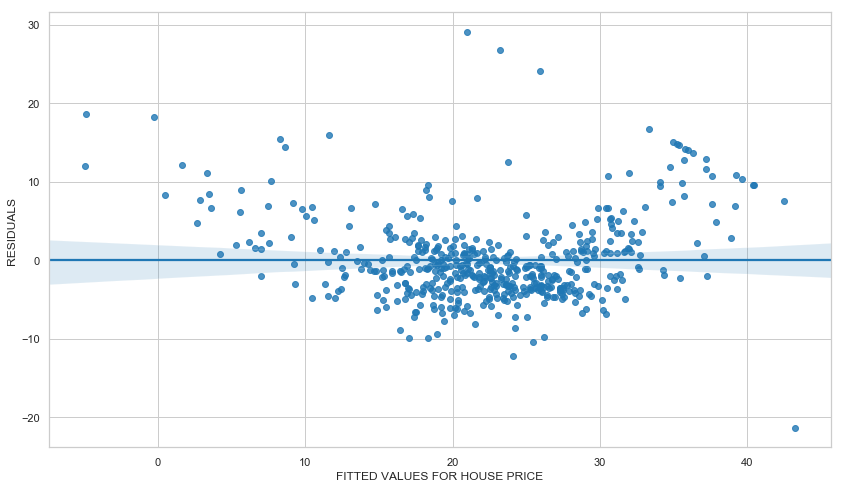

In [38]:
# Residuals vs Fitted Values
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.regplot(model.fittedvalues, model.resid)
ax.set_xlabel('FITTED VALUES FOR HOUSE PRICE', fontsize=12)
ax.set_ylabel('RESIDUALS', fontsize=12);

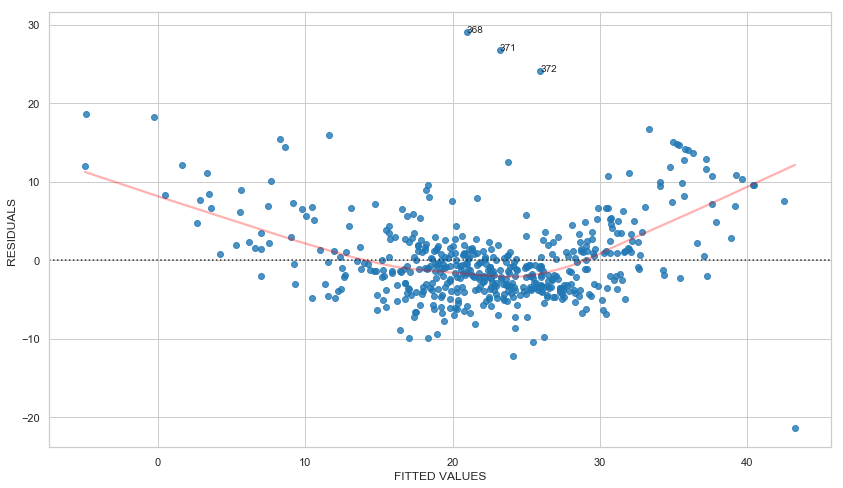

In [39]:
# Residuals vs Fitted Values
fig, ax = plt.subplots(figsize=(14,8))
sns.residplot(model.fittedvalues, model.resid, lowess=True, line_kws={'color':'red', 'alpha':0.3})
ax.set_xlabel('FITTED VALUES', fontsize=12)
ax.set_ylabel('RESIDUALS', fontsize=12)

# Annotations
abs_resid = model.resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    ax.annotate(i, xy=(model.fittedvalues[i], model.resid[i]));

>**Residuals versus Fits plot**
The plot is used to detect non-linearity, unequal error variances, and outliers.  Any data point that falls directly on the estimated regression line has a residual of 0. Therefore, the residual = 0 line corresponds to the estimated regression line.
>
>  If there is a strong pattern in the residuals, that indicates non-linearity in the data. In our case the residuals somewhat exhibit U-shape which is an indicator of *non-linearity* in the data.
>
> Here are the characteristics of a well-behaved residual vs. fits plot and what they suggest about the appropriateness of the simple linear regression model:
>
> - The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.
> - The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.
>- No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers. 
>
>**Well, not all of the conditions are satisfied in above plots so we should check if there are high leverage points in our predictors.**.


#### Scale-Location Plot (Heteroscedasticity)

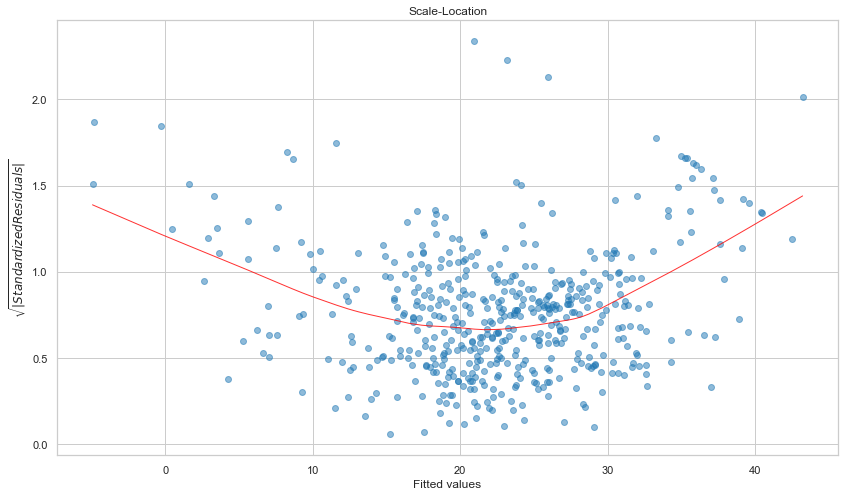

In [40]:
fig, ax = plt.subplots(figsize=(14,8))

# Normalized residuals
normalized_resid = model.get_influence().resid_studentized_internal

# Absolute sqroot normalized residuals
sq_normalized_resid = np.sqrt(np.abs(normalized_resid))

plt.scatter(model.fittedvalues, sq_normalized_resid, alpha=0.5)
sns.regplot(model.fittedvalues, sq_normalized_resid, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Standardized Residuals|}$');

#### Leverage Plot

This plot shows if any outliers have influence over the regression fit. Anything outside the group and outside “Cook’s Distance” lines, may have an influential effect on model fit.

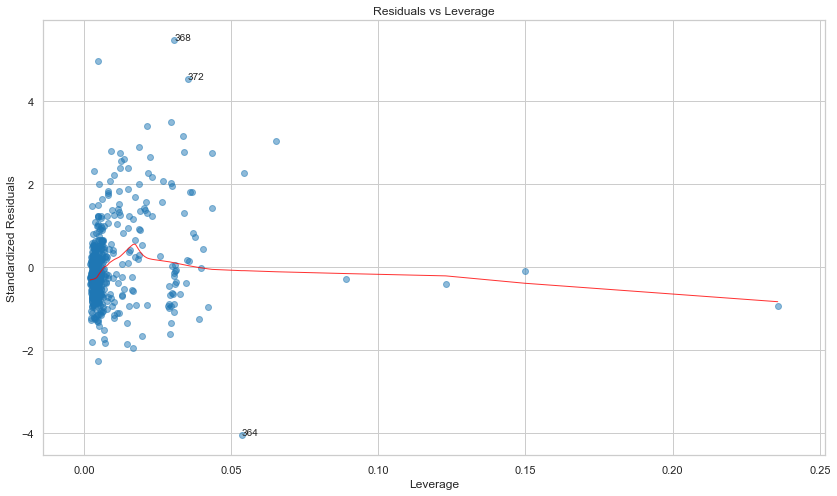

In [41]:
fig, ax = plt.subplots(figsize=(14,8))

# Normalized residuals
normalized_resid

# Model Leverage
leverage = model.get_influence().hat_matrix_diag

# Cook's distance 
cooks = model.get_influence().cooks_distance[0]

plt.scatter(leverage, normalized_resid, alpha=0.5)
sns.regplot(leverage, normalized_resid,
           scatter=False,
           ci=False,
           lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')

# Annotations
leverage_top_3 = np.flip(np.argsort(cooks), 0)[:3]

for i in leverage_top_3:
    ax.annotate(i, xy=(leverage[i], normalized_resid[i]))

In [42]:
# Let's calculate the RSE (Residual Standard Error; the smaller the better)
rss = np.sum(model.bse)
rse = np.sqrt(rss/(len(bos)-1))
rse

0.09526822730027996

### Evaluating the Model

Three statistics commonly used in Ordinary Least Squares (OLS) regression to evaluate model fit are: the Coefficient of Determination ($R^2$), the $F$-Statistic, and the Root Mean Squared Error (RMSE). 

#### Key Metrics

* Residual Sum of Squares (RSS) - measures the amount of error in the fitted model( Measures the amount of variability that is left unexplained after regression applied):

$$ \text{RSS} = \sum_{i=1}^N \left(y_i - \hat y_i \right)^2 $$


* Explained Sum of Squares (ESS) - measures the variance explained by the regression model:
$$ \text{ESS} = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 $$


* Total Sum of Squares (TSS):
$$ \text{TSS} = \sum_{i=1}^N \left( {y}_i - \bar{y} \right)^2 $$


* Therefore:
$$ \text{TSS} = {\text{ESS}}+{\text{RSS}} $$


#### Assessing the Accuracy of the Model

* Residual Standard Error ( An absolute measure of LACK of FIT of the Model)
It is the average amount that the response will deviate from the true regression line. If the predictions obtained using the model are very close to the true outcome values then **RSS** will be small. Thus, the Model fits the data very well. RSE is computed by:

$$ RSE = \sqrt{\frac{\text{RSS}}{n-2}} $$



* $R^2$ measures the proportion of variability in $Y$ that can be explained using $X$. $R^2$ usually indicates how well the model can explain the variation in response variable. Intuitively, $0$ indicates that the proposed model does not improve prediction over the mean model and $1$ indicates perfect prediction. Improvement in the regression model results in proportional increases in $R^2$.

$$ R^2 = 1- \frac{\text{RSS}}{\text{TSS}} $$



The threshold for an acceptable $R^2$ value depends on the domain (subject field), so it is most useful for comparing different models.

#### Adjusted $R^2$
One pitfall of $R^2$ is that it can only increase as predictors are added to the regression model. This increase is artificial when predictors are not improving the model’s fit. Adjusted $R^2$, takes into account the number of predictor variables and observations. Adjusted $R^2$ will decrease as predictors are added if the increase in model fit does not make up for the loss of degrees of freedom, and will increase as predictors are added if the increase in model fit is beneficial. Adjusted $R^2$ should be evaluated for models with more than one predictor variable.

$$ R_{adj}^2 = 1 - \frac{\left(\frac{RSS}{N-P-1}\right)}{\left(\frac{TSS}{N-1}\right)} $$ 

where:
* $P$ = the number of predictors


* $N$ = the number of observations


---
#### The $F$-Statistic

The $F$-test evaluates the null hypothesis that all regression coefficients are equal to zero versus the alternative that at least one is not. An equivalent null hypothesis is that $R^2$ equals zero. A significant $F$-test indicates that the observed $R^2$ is reliable, and is not a false result of oddities in the data. Thus, the $F$-test determines whether the proposed relationship between the response variable and the set of predictors is statistically reliable.

$$ F = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - P - 1}{P} \right) $$ 

The $p$-value can be checked with statistical software by providing the $F$-Statistic and degrees of freedom values. If the $F$-distribution provides a $p$-value that is lower than some threshold, reject the null hypothesis.

---
#### Mean Squared Error

MSE represents the difference between the observations and the predicted values. It is used to determine the extent to which the model fits the data as well as the impact of removing predictors. It is always non-negative, and values closer to zero are better.

$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^N \left(y_i - \hat y_i \right)^2 $$

#### Root Mean Squared Error
Whereas $R^2$ is a relative measure of fit, RMSE is an absolute measure of fit, and has the useful property of being in the same units as the response variable. Lower values indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and is the most important criterion for fit if the main purpose of the model is prediction.

$$ \text{RMSE} = \sqrt{\text{MSE}} $$

---
### Regularization
Linear regression minimizes a loss function, estimating a coefficient for each predictor. Large coefficients can lead to overfitting, so regularization penalizes large coefficients.

#### Lasso Regularization
* Lasso penalizes the sum of absolute values of regression coefficients. It is calculated by adding the lasso function to the OLS loss function:

$$ \sum_{i=1}^N \left(y_i - \hat y_i \right)^2 \;+\; \alpha \times \sum^{\rm P}_{\rm j=1}|b_j| $$

* Lasso shrinks the coeffecients of less important features to exactly $0$, so it is great for selecting important features (predictors), especially for datasets with a lot of variables.

#### Ridge Regression
* Ridge penalizes the sum of squares of the model coefficients. It is calculated by adding the ridge function to the OLS loss function:

$$ \sum_{i=1}^N \left(y_i - \hat y_i \right)^2 \;+\; \alpha \times \sum^{\rm P}_{\rm j=1}b^2_j $$

* Ridge is particularly useful when there is multicolinearity amongst the predictor variables.

---
The $\alpha$ hyperparameter determines the strength of the penalty, and can be tuned via cross-validation. Since the addition of a reguarization function involves multiplying such by $\alpha$, an $\alpha$ of $0$ is the same as (overfitting) ordinary least squares. Conversely, very high $\alpha$ can lead to underfitting.

<br>
Since the coefficients are partially determined by the scale of the features, and all coefficients are summed together for regularized models, **the features must be standardized**. One way to do so is to remove the mean and scale to unit variance.

### Fitting Linear Regression using `sklearn`


In [43]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predict()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [44]:
# Look inside lm object
# lm.<Tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [82]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


> - One of the parameters of the LinearRegression method of Sklear is `fit_intercept` which can be adjusted to fit or not fit an intercept term. Here is the full explanation from the documentation: ``whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).``
>
> - Error terms must be uncorrelated. We use residuals to approximate the error terms as the exact error terms are unknown. We could use the residual plots to check independence. A random pattern in the plot is an idication of the independence.A histogram (whether of outcome values or of residuals) is not a good way to check for normality, since histograms of the same data but using different bin sizes (class-widths) and/or different cut-points between the bins may look quite different.Instead, use a probability plot (also know as a quantile plot or Q-Q plot).
> For more info [visit](https://web.ma.utexas.edu/users/mks/statmistakes/modelcheckingplots.html).
> - No, there is no such requirement. However, the mean of the response variable is a linear combination of regression parameters and the predictor variables. That is called Linearity.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [83]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036401


In [84]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [85]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [86]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

Skewness:  0.11077348255970541


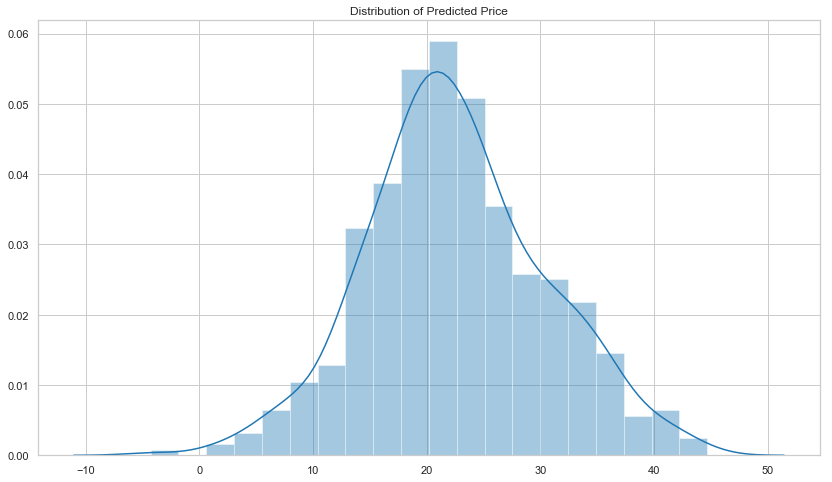

In [87]:
# Plot the Distribution
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.distplot(lm.predict(X))
ax.set_title('Distribution of Predicted Price', fontsize=12);
print('Skewness: ', stats.skew(lm.predict(X)))

> So it is slightly right skewed. Note that data have problematic values around $0$. We may need to scale the independent variables to remove the effect of negative correlated data. Recall the correlation matrix in EDA section, many predictors are negatively related to the response value so the linear model may have affected by that.

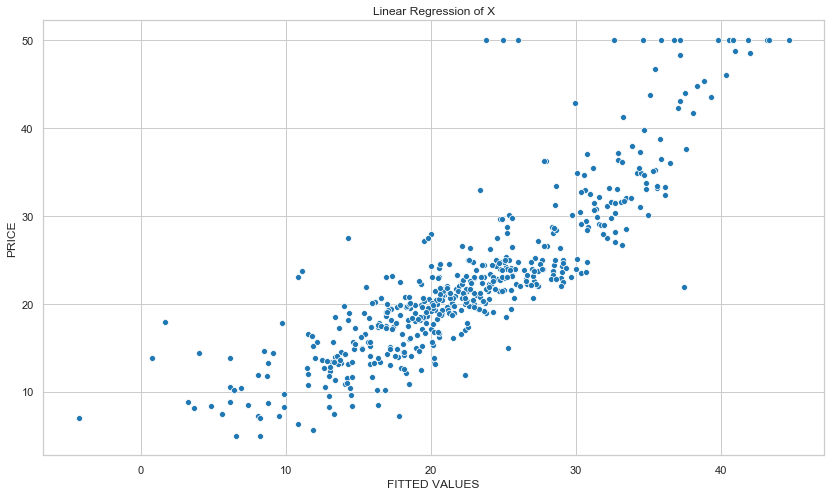

In [88]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.scatterplot(lm.predict(X), bos.PRICE);
ax.set_xlabel('FITTED VALUES', fontsize=12)
ax.set_title('Linear Regression of X', fontsize=12);

> The scatter plot does not disagree with the scatter plot of PRICE vs RM in OLS of statsmodel

In [89]:
# Compute R^2 for linear model of OLS
print('R-squared OLS: ', model.rsquared)

# Compute R^2 for linear model of Sklearn
RSS = np.sum((bos.PRICE - lm.predict(X))**2)
ESS = np.sum((lm.predict(X) - np.mean(bos.PRICE))** 2) 
TSS = RSS + ESS
R_squared = 1 - RSS/TSS
print('R-squared Sklearn: ', R_squared)


R-squared OLS:  0.657712457807751
R-squared Sklearn:  0.7406077428649606


> Both scores reflect the performance of the models when applied to the raw data without scaling, removing outliers, etc.

# MODEL EVALUATIONS

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [53]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149875


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [54]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

1.3184483482270993e-22


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and  PRICE.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [55]:
def reshape_entry(x, t, df):
    '''Reshape given predictor or predictors'''
    # Reshape
    x = x.split()
    X = df.loc[:,x].values
    y = df.loc[:,[t]].values
    return X, y


def model_fit(x, y):
    '''Fit linear model'''
    
    # Fit Linear Model
    lm.fit(x, y)
    
    return lm.coef_, lm.intercept_ , lm.score(x,y)


def f_stat(N, K, R_squared):
    '''Compute F statistic'''
    f_stat = (R_squared/(1 - R_squared)) * ((N - K - 1)/(K))
    return f_stat

def t_stat(beta, x, y):
    '''For Simple LR Compute t-statistic for the slope/coefficient'''
    # Compute RSS 
    RSS = np.sum((y - lm.predict(x))**2)
    
    # Compute Standard Error for the coefficient
    #SE of regression slope =sqrt[Σ(yi – ŷi)^2/(n – 2)]/sqrt[ Σ(xi – x)^2]
    N = len(x)
    se_beta = np.sqrt(RSS/(N-2)) / np.sqrt(np.sum((x-np.mean(x))**2))
    
    # Compute t statistic
    beta_val = beta
    t_stat = beta_val/se_beta
    
    return t_stat

In [56]:
def output(predictor, response,N, K, df):
    '''Report Model Statistics'''
    X, y = reshape_entry(predictor, response, df)
    coef, intercpt, r_sq = model_fit(X,y)
    f = f_stat(506, 1, r_sq)
    t = t_stat(coef, X, y)
    
    # Prepare the output report table
    report = ['Slope', 'Intercept', 'R_squared', 'F-Stat', 't-Stat']
    model_stats = [coef, intercpt, r_sq, f, t]
    values = pd.Series(model_stats).values.reshape((1,5)).astype('float')
    report_df = pd.DataFrame(values, columns=report, index= [predictor])
    return report_df

# Print the report
output('PTRATIO', 'PRICE', 506,1,bos)

,Slope,Intercept,R_squared,F-Stat,t-Stat
PTRATIO,-2.157175,62.344627,0.257847,175.105543,-13.232745


In [90]:
bos['PRICE'].max()

50.0

## QUESTION: How come the intercept can be higher than the Maximum House Price available in the data or lower than the Minimum Price ???
 
It is just a line equation that fits the data regardless of its max or min... 

$b_0= \overline{y}-b_1*\overline{x}$

So depending on the slope $b_1$, $b_0$ can take weird values.

> A one unit increase in Education quality ($\%$ of Teacher per Student) associated with $2.5$ $\%$ decrease of house price on average. Simply, as student denstity per teacher is increasing, we might expect a decline in education quality. Therefore a decline in house price makes sense.
>
>Regardless of the education standards house prices are about $\$62.000$ on average. 
>
>According to $R^2$ value, education quality is not the only factor on house prices. It was only able to explain $25 \%$ of the variation in house prices.
>
>F-statistic and its p_values are significant so we can reject that the slope is 0 in this simple linear regression.
>
> Square of t-statistic value equals to F-statistic in this simple linear regeression. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [58]:
def output(predictor, response,N, K, df):
    '''Report Model Statistics'''
    X, y = reshape_entry(predictor, response, df)
    coef, intercpt, r_sq = model_fit(X,y)
    f = f_stat(506, 1, r_sq)
    
    # Convert Numpy Array to a list for convenient
    coefficients = list(list(coef)[0])
    stats =  [r_sq, f, float(intercpt)] + coefficients
    names = ['R_squared', 'F_statistic',
             'Intercept','Coef_CRIM', 'Coef_RM', 'Coef_PTRATIO']
    
    # Prepare the output report table
    report_df = pd.DataFrame(stats, columns=['Results'], index=names)
    
    return report_df

# Print the report
output('CRIM RM PTRATIO', 'PRICE', 506, 3, bos)

,Results
R_squared,0.593414
F_statistic,735.590621
Intercept,-3.306617
Coef_CRIM,-0.202110
Coef_RM,7.381567
Coef_PTRATIO,-1.074187


> F statistic suggests that predictors do have a relationship with repsonse variable. Simply, none of the slopes are 0.
>
> Adding more features/information usually increase the $R^2$ value. It also suggests that these three variables were able to explain $59 \%$ of the variation in response variable (house price). $R^2$ describes performance of the model. 
>
> Coefficients make sense, except the intercept. Negative house price???
>
> We want less student density in a classroom and less crime in neighborhood obviously to observe an increment in house prices. 

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF$ is residual degrees of freedom and is defines as $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. **Lower values of AIC indicate better fitting models.**

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [59]:
# Least Squares Fit
formula = 'PRICE ~ CRIM + RM + PTRATIO'
model1 = smf.ols(formula, data=bos).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.09e-97
Time:                        12:11:04   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
RM             7.3816      0.402     18.360      0.000       6.592       8.171
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Sum of Squared residuals
rss1 = model1.ssr
print(rss1)
# Residual Degrees of Freedom
res_df_1 = model1.df_resid
print(res_df_1)

17367.84106172869
502.0


In [61]:
# Least Squares Fit
formula = 'PRICE ~ CRIM + RM + PTRATIO + LSTAT + C(CHAS)'
model2 = smf.ols(formula, data=bos).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          1.21e-124
Time:                        12:11:05   Log-Likelihood:                -1543.9
No. Observations:                 506   AIC:                             3100.
Df Residuals:                     500   BIC:                             3125.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.6402      3.924      4.241      0.000       8.931      24.350
C(CHAS)[T.1.0]     3.3902      0.910      3.725      0.000       1.602       5.178
CRIM              -0.0611      0.030     -2.011      0.045      -0.121      -0.001
RM                 4.5204      0.422     10.703      0.000       3.691       5.350
PTRATIO           -0.8500      0.118     -7.214      0.000      -1.082      -0.619
LSTAT             -0.5409      0.045    -12.022      0.000      -0.629      -0.452
==============================================================================
Omnibus:                      198.559   Durbin-Watson:                   0.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.929
Skew:                           1.667   Prob(JB):                    4.48e-218
Kurtosis:                       9.030   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Sum of Squared residuals
rss2 = model2.ssr
print(rss2)
# Residual Degrees of Freedom
res_df_2 = model2.df_resid
print(res_df_2)

13242.886065165634
500.0


In [63]:
# F- test for model comparison
F = ((rss1-rss2)/(res_df_1-res_df_2))/(rss2/res_df_2)
F

77.87114863529304

In [64]:
# Cehck the p_value for F statistics
f_cricial = stats.f.ppf(1-0.05, res_df_1-res_df_2, res_df_2)
print('F cricial value: ',f_cricial)
p_val = stats.f.sf(F,res_df_1-res_df_2, res_df_2 )
print('P value for F: ', p_val)

F cricial value:  3.013753005713494
P value for F:  3.624112158077159e-30


> **$H_0$ :  Coefficients of `LSTAT` and `CHAS` is 0. (Simpler model is better ) 
> 
>**$H_a$ : Not Zero 
>
>If the simpler model  `Model-1` is correct you expect to get an F ratio near 1.0. If the ratio is much greater than 1.0, there are two possibilities:
>
>•The more complicated model is correct.
>
>•The simpler model is correct, but random scatter led the more complicated model to fit better. The P value tells you how rare this coincidence would be

Metric |Model 1 | Model 2 | Comment
--- | --- | -- | --
`AIC`  |  $3233$  |  $3100$  |    Model 2 provides slightly better fit 
`F-statistic` | $77.8$ | $$p_{value}  < .05$$  | We reject the null hyptothesis. Advanced Model provides better fit to the data


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. When you run a regression analysis, the variance of the error terms must be constant, and they must have a mean of zero. If this isn't the case, your model may not be valid. **Error terms have a constant Variance!** The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li>**Correlation of Error Terms:** Error terms are uncorrelated. 
</li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [91]:
linear_model = model1
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.09e-97
Time:                        12:32:48   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
RM             7.3816      0.402     18.360      0.000       6.592       8.171
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fitted vs Residual Plot

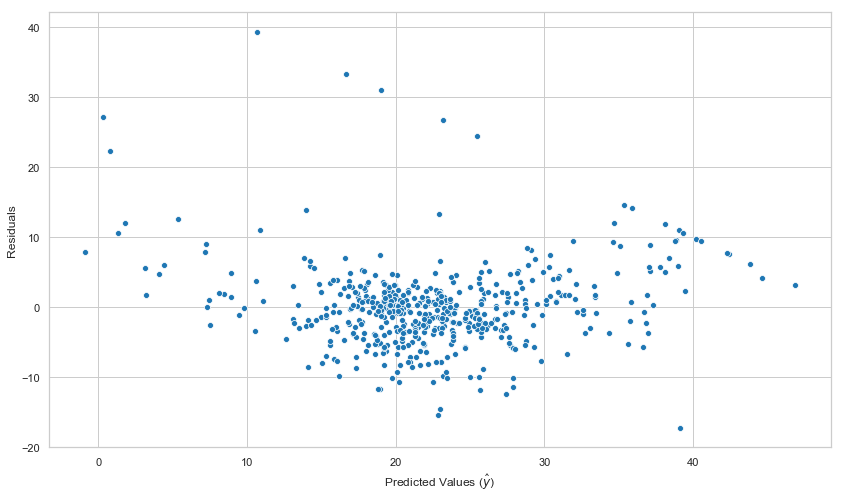

In [92]:
# Fitted vs Residual plot
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(linear_model.fittedvalues, linear_model.resid, ax=ax)
ax.set_xlabel('Predicted Values ($\hat y$)')
ax.set_ylabel('Residuals');

> Possible non-liearity relation exists in the model variables. There is form of a curve. Also looks like there are either high leverage points or outliers in the model.
>
>The accuracy of the prediction is on the y-axis. The distance from the line at 0 is how bad the prediction was for that value.
>
> Residual = Observed – Predicted
>
> Positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.
>

### Distribution of Residuals

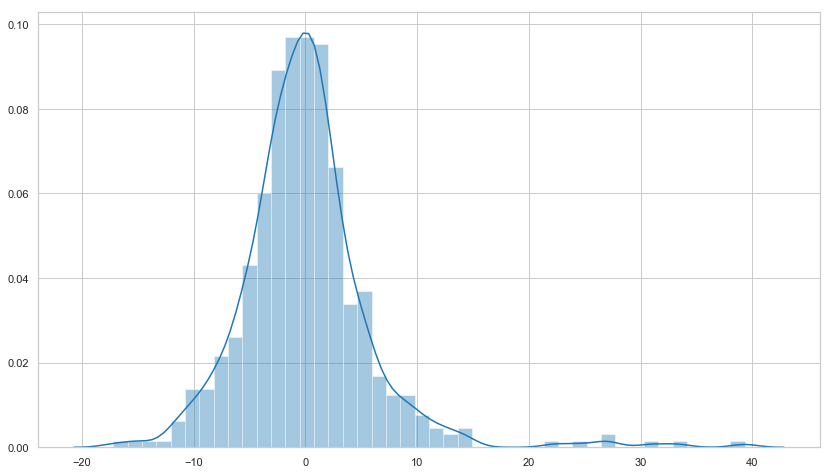

In [93]:
fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(linear_model.resid);

> Observe some influential points standing out of the bell curve.
> Distribution is almost symmetric with large kurtosis.

In [94]:
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( stats.kurtosis(linear_model.resid) ))
print( 'skewness of normal distribution (should be 0): {}'.format( stats.skew(linear_model.resid) ))

excess kurtosis of normal distribution (should be 0): 9.054190465259362
skewness of normal distribution (should be 0): 1.8024904367222592


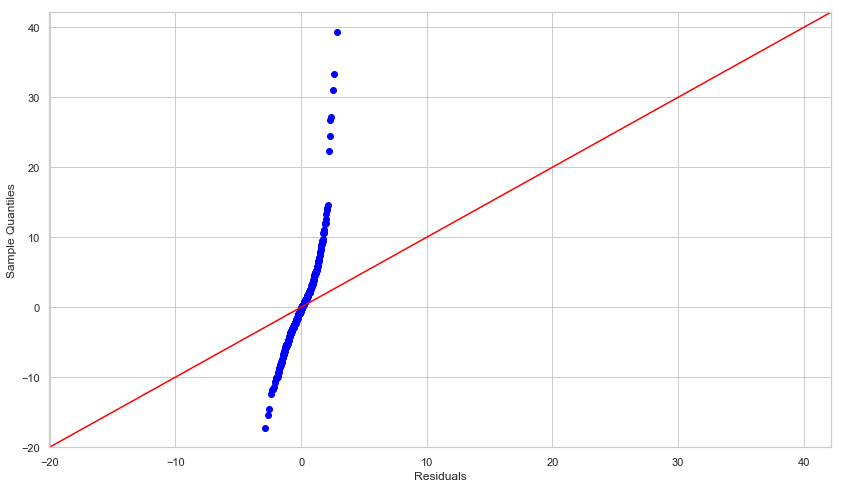

In [69]:
# Normality check for residuals
# Fitted vs Residual plot
fig, ax = plt.subplots(figsize=(14,8))
sm.qqplot(linear_model.resid, line='45', ax=ax)
ax.set_xlabel('Residuals'); 

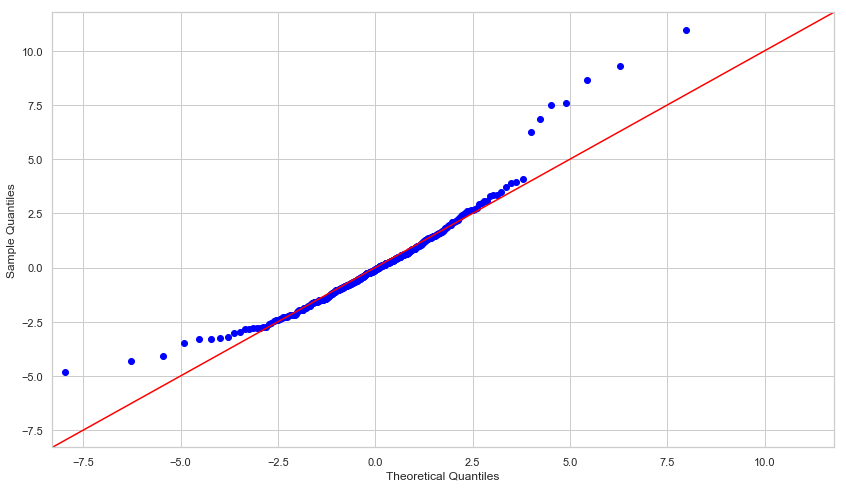

In [70]:
# Automatically determine parameters for t distribution including 
# loc and scale
# q-q plot: Compares the sample and theoretical quantiles
fig, ax = plt.subplots(figsize=(14,8))
sm.qqplot(linear_model.resid, stats.t, fit=True,  line='45', ax=ax);


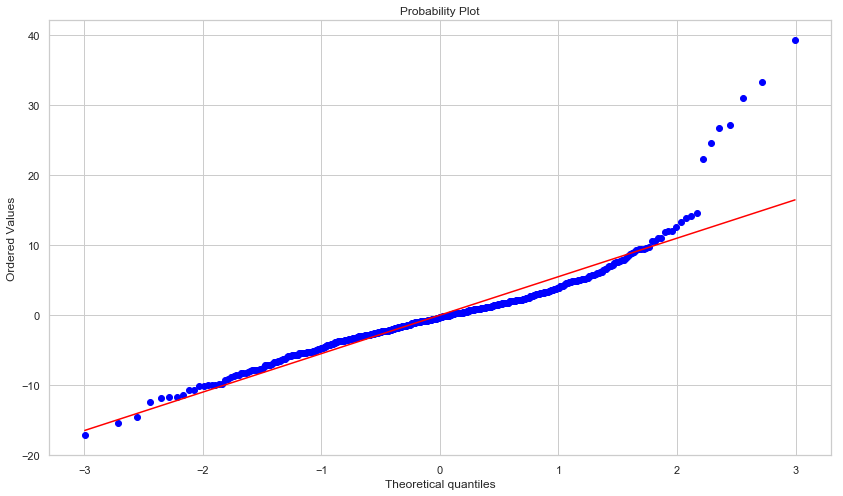

In [71]:
# probplot: contains unscaled quantiles of the sample data
fig, ax = plt.subplots(figsize=(14,8))
stats.probplot(linear_model.resid, dist='norm', plot=plt)
plt.show()

> The Normal QQ plot helps us to assess whether the residuals are roughly normally distributed. If the residuals look far from normal we may be in trouble. In particular, if the residual tend to be larger in magnitude than what we would expect from the normal distribution, then our p-values and confidence intervals may be too optimisitic. i.e., we may fail to adequately account for the full variability of the data.
>
> Obviously the first Q-Q plot is weird. I do not know why. Howeve, other graphs above tell us that there some high influential points in data but residuals nearly normally distributed!

### Influential Points

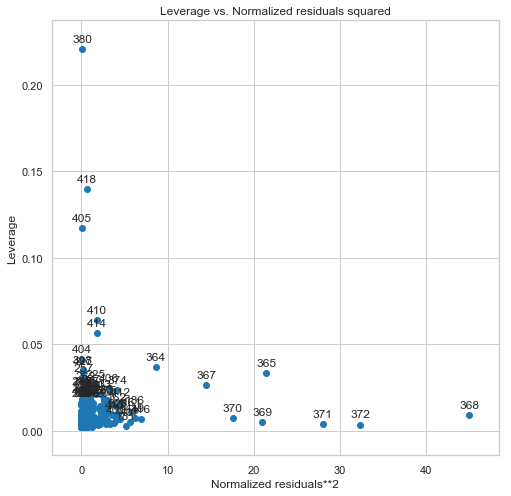

In [72]:
from statsmodels.graphics.regressionplots import *

# Normalized Residuals vs Leverage
fig, ax = plt.subplots(figsize=(8,8))
plot_leverage_resid2(linear_model, ax=ax);


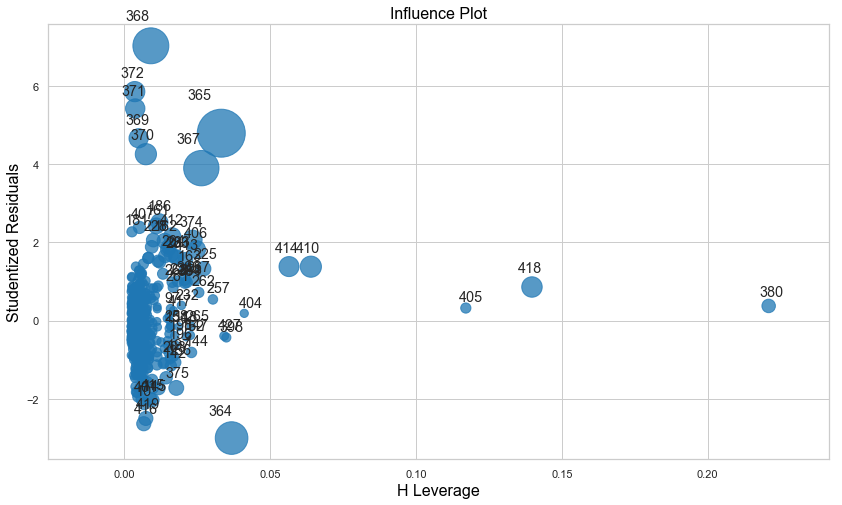

In [73]:
# Influence Plot: Leverage vs Studentized Residuals
fig, ax = plt.subplots(figsize=(14,8))
influence_plot(linear_model, ax=ax);

> h_index range: $ [\frac{1}{n} , \frac{p+1}{n}]$
>
>where n is number of observations, p is number of feautures in the model

In [290]:
h_lower = 1/506
print(h_lower)
h_upper = (3+1)/506
print(h_upper)

0.001976284584980237
0.007905138339920948
